In [19]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Vedangi Sawant\\Downloads\\glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [20]:
# Create binary target: 1 if Type == 1, else 0
df['BinaryType'] = (df['Type'] == 1).astype(int)

# Split features and target
X = df.drop(columns=['Type', 'BinaryType'])
y = df['BinaryType']

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

model = LogisticRegression()
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.5, 0.7]
for thresh in thresholds:
    preds = (probs >= thresh).astype(int)
    print(f"Threshold: {thresh}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("------")


Threshold: 0.3
Accuracy: 0.7441860465116279
Precision: 0.5
Recall: 0.9090909090909091
------
Threshold: 0.5
Accuracy: 0.8372093023255814
Precision: 0.7
Recall: 0.6363636363636364
------
Threshold: 0.7
Accuracy: 0.7906976744186046
Precision: 0.75
Recall: 0.2727272727272727
------


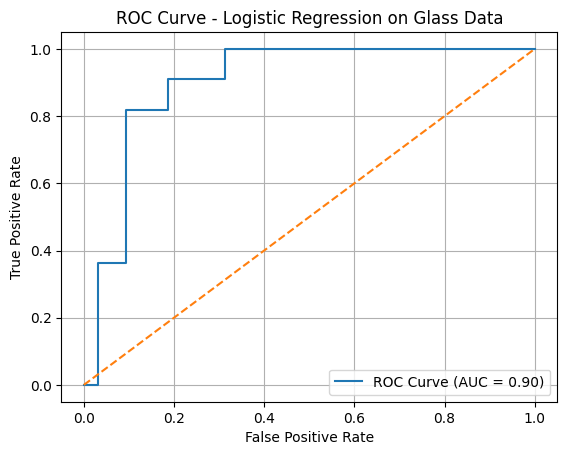

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression on Glass Data")
plt.legend()
plt.grid()
plt.show()


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_cluster = scaler.fit_transform(df.drop(columns=['Type', 'BinaryType']))  # same as X_scaled

inertias = []
silhouettes = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_cluster, labels))


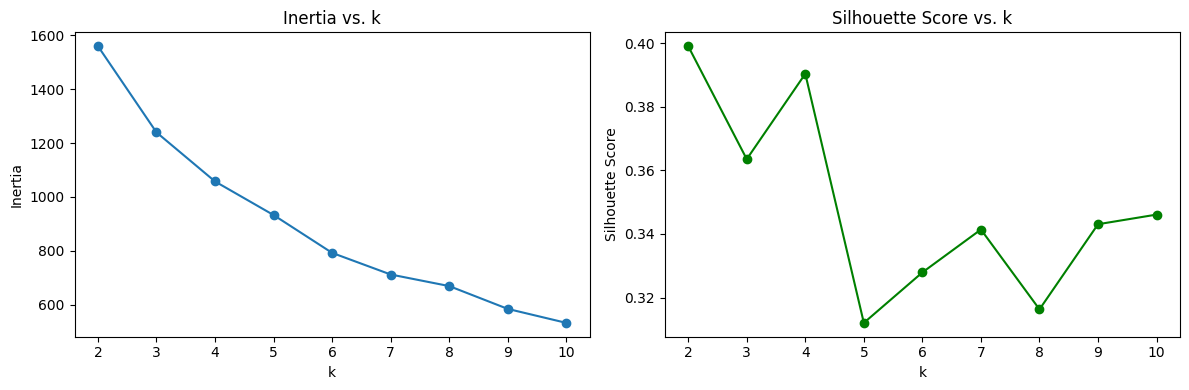

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title("Inertia vs. k")
plt.xlabel("k")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.title("Silhouette Score vs. k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


1) How do inertia and silhouette scores change?

As we increase the number of clusters k, the inertia (sum of squared distances to the nearest cluster center) decreases — this is expected because more clusters reduce within-cluster variance.

However, silhouette score tends to peak at an optimal k, then decrease. A high silhouette score indicates well-separated clusters, while a drop implies overlapping or poorly formed clusters.

This balance helps determine the ideal number of clusters.

2) What if you don’t scale your features?
If we skip feature scaling, variables with larger magnitudes (e.g., Ca or RI) dominate the distance calculations in clustering.

As a result:

KMeans may form biased clusters, ignoring important features with smaller scales.

Silhouette scores typically drop, and the clustering may become unreliable.

Scaling ensures that all features contribute equally to the distance metric.



3) Is there a “right” value of k?
There is no universally "correct" k — it depends on:

The structure of your data

Domain knowledge (e.g., known classes or business goals)

Visual methods like:

The elbow point in the inertia plot

The peak silhouette score

We typically choose a value of k that balances model simplicity and interpretability with cluster quality.